In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [2]:
sc._settings.ScanpyConfig.n_jobs = -1

In [2]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [11]:
df = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets2/feto_maternal/quantification/Supplementary_table_3_single_cells_updated.csv')

In [8]:
df.columns

Index(['cell_size', 'CD11c', 'CD14', 'CD16', 'CD163', 'CD20', 'CD206', 'CD3',
       'CD31', 'CD4', 'CD44', 'CD45', 'CD56', 'CD57', 'CD68', 'CD8', 'CD80',
       'CK7', 'DC-SIGN', 'Ecad', 'FoxP3', 'Galectin-9', 'GrB', 'H3', 'HLA-DR',
       'HLA-G', 'HO-1', 'IDO-1', 'Ki67_raw', 'Lck', 'PD-1', 'PD-L1', 'SMA',
       'TIGIT', 'TIM-3', 'Tryptase', 'VIM', 'background', 'iNOS', 'area',
       'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter',
       'Point', 'lineage', 'Ki67_divided_by_H3', 'Ki67_binary', 'TIGIT_binary',
       'TIM-3_binary', 'GrB_binary', 'iNOS_binary', 'Lck_binary',
       'PD-1_binary', 'HO-1_binary', 'Galectin-9_binary', 'PD-L1_binary',
       'IDO-1_binary', 'overlap_arteries', 'overlap_vessels',
       'overlap_decidua', 'overlap_cell_column', 'overlap_gland',
       'FlowSom_cluster', 'centroid0', 'centroid1', 'area_nuclear',
       'label_nuclear', 'nucleated', 'overlap_decidua_only',
       'point_mean_delta', 'distance_from_artery', 'cell_ID_i

In [9]:
df

,cell_size,CD11c,CD14,CD16,CD163,CD20,CD206,CD3,CD31,CD4,...,centroid1,area_nuclear,label_nuclear,nucleated,overlap_decidua_only,point_mean_delta,distance_from_artery,cell_ID_in_Point,microenvironment,microenvironment_figure
0,495,0.000000,0.858311,0.769537,0.826435,0.305853,0.854678,0.000000,0.000000,0.869078,...,35,0,0,False,1,1.645576,426.656771,1,1.0,A
1,356,0.000000,0.608643,0.000000,0.356172,0.000000,0.000000,0.613772,0.000000,0.000000,...,629,205,1856,True,0,1.645576,NaN,2,NaN,NaN
2,325,0.000000,0.821260,0.619963,0.814300,0.482688,0.728758,0.000000,0.000000,0.777645,...,1189,213,1117,True,1,1.645576,328.184399,3,8.0,F
3,462,0.000000,0.818859,0.596728,0.623279,0.000000,0.507723,0.000000,0.000000,0.786343,...,1914,269,1745,True,1,1.645576,286.043703,4,10.0,H
4,721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,322,0,0,False,1,1.645576,505.262308,5,2.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495344,325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1846,0,0,False,1,NaN,NaN,2488,4.0,C
495345,149,0.068865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1718,159,685,True,1,NaN,NaN,2489,5.0,D
495346,1123,0.725608,0.631638,0.537892,0.686284,0.277864,0.354021,0.000000,0.417691,0.591745,...,1977,0,0,False,1,NaN,NaN,2490,4.0,C
495347,1205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,431,0,0,False,1,NaN,NaN,2491,3.0,not_in_fig


In [32]:
df['point_mean_delta'].isna().sum()

122382

In [12]:
df.drop(columns=['Ki67_divided_by_H3', 'Ki67_binary', 'TIGIT_binary', 'TIM-3_binary', 'GrB_binary', 'iNOS_binary', 'Lck_binary', 'PD-1_binary', 
                 'HO-1_binary', 'Galectin-9_binary', 'PD-L1_binary', 'IDO-1_binary', 'overlap_arteries', 'overlap_vessels', 'overlap_decidua',
                 'overlap_cell_column', 'overlap_gland', 'FlowSom_cluster', 'label_nuclear', 'label_nuclear', 'microenvironment', 'microenvironment_figure'], inplace=True)
df.rename(columns={'lineage': 'cell_type'}, inplace=True)
df = reorder_columns(df, 'cell_type', 'cell_ID_in_Point')
df = reorder_columns(df, 'cell_size', 'area')
df['nucleated'] = df['nucleated'].replace({'yes': 1, 'no': 0})
df['nucleated'] = df['nucleated'].astype(int)
df.rename(columns={'centroid0': 'y', 'centroid1': 'x'}, inplace=True)
df = reorder_columns(df, 'y', 'x')

In [13]:
df

,CD11c,CD14,CD16,CD163,CD20,CD206,CD3,CD31,CD4,CD44,...,Point,x,y,area_nuclear,nucleated,overlap_decidua_only,point_mean_delta,distance_from_artery,cell_ID_in_Point,cell_type
0,0.000000,0.858311,0.769537,0.826435,0.305853,0.854678,0.000000,0.000000,0.869078,0.602367,...,10_31742_1_2,35,1146,0,0,1,1.645576,426.656771,1,Mac2a
1,0.000000,0.608643,0.000000,0.356172,0.000000,0.000000,0.613772,0.000000,0.000000,0.632391,...,10_31742_1_2,629,1245,205,1,0,1.645576,NaN,2,other
2,0.000000,0.821260,0.619963,0.814300,0.482688,0.728758,0.000000,0.000000,0.777645,0.618453,...,10_31742_1_2,1189,760,213,1,1,1.645576,328.184399,3,Mac2a
3,0.000000,0.818859,0.596728,0.623279,0.000000,0.507723,0.000000,0.000000,0.786343,0.612739,...,10_31742_1_2,1914,1151,269,1,1,1.645576,286.043703,4,Mac2a
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122189,...,10_31742_1_2,322,10,0,0,1,1.645576,505.262308,5,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.409816,...,16_31766_3_2,1846,1735,0,0,1,NaN,NaN,2488,Fibroblasts
495345,0.068865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16_31766_3_2,1718,796,159,1,1,NaN,NaN,2489,Fibroblasts
495346,0.725608,0.631638,0.537892,0.686284,0.277864,0.354021,0.000000,0.417691,0.591745,0.570298,...,16_31766_3_2,1977,472,0,0,1,NaN,NaN,2490,NK3
495347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095473,...,16_31766_3_2,431,749,0,0,1,NaN,NaN,2491,Fibroblasts


In [50]:
df.dtypes

cell_size                 int64
CD11c                   float64
CD14                    float64
CD16                    float64
CD163                   float64
CD20                    float64
CD206                   float64
CD3                     float64
CD31                    float64
CD4                     float64
CD44                    float64
CD45                    float64
CD56                    float64
CD57                    float64
CD68                    float64
CD8                     float64
CD80                    float64
CK7                     float64
DC-SIGN                 float64
Ecad                    float64
FoxP3                   float64
Galectin-9              float64
GrB                     float64
H3                      float64
HLA-DR                  float64
HLA-G                   float64
HO-1                    float64
IDO-1                   float64
Ki67_raw                float64
Lck                     float64
PD-1                    float64
PD-L1   

In [14]:
df.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets2/feto_maternal/quantification/processed/decidua_cleaned.csv', index=False)

In [66]:
X_columns = df.columns[:df.columns.get_loc('area')]
obs_columns = df.columns[df.columns.get_loc('area'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [67]:
adata.X.max()

3.12289877484048

In [68]:
adata.raw = adata
adata.X = np.arcsinh(adata.X)
adata.layers['zscore'] = z_score_normalization(adata.X)

In [77]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


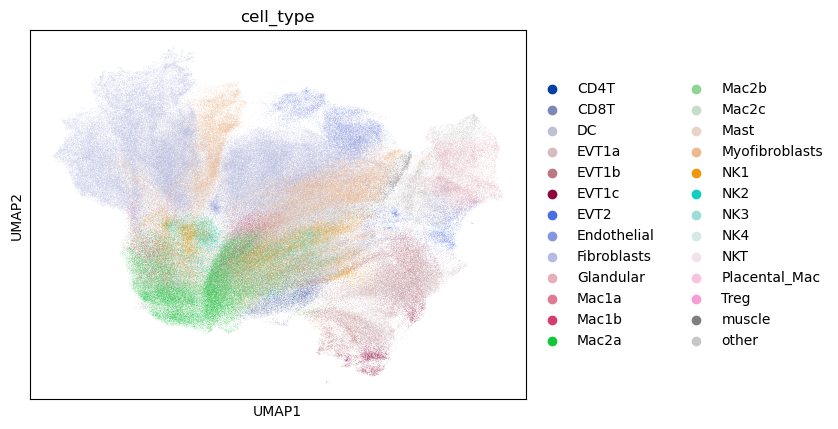

In [78]:
sc.pl.umap(adata, color='cell_type')

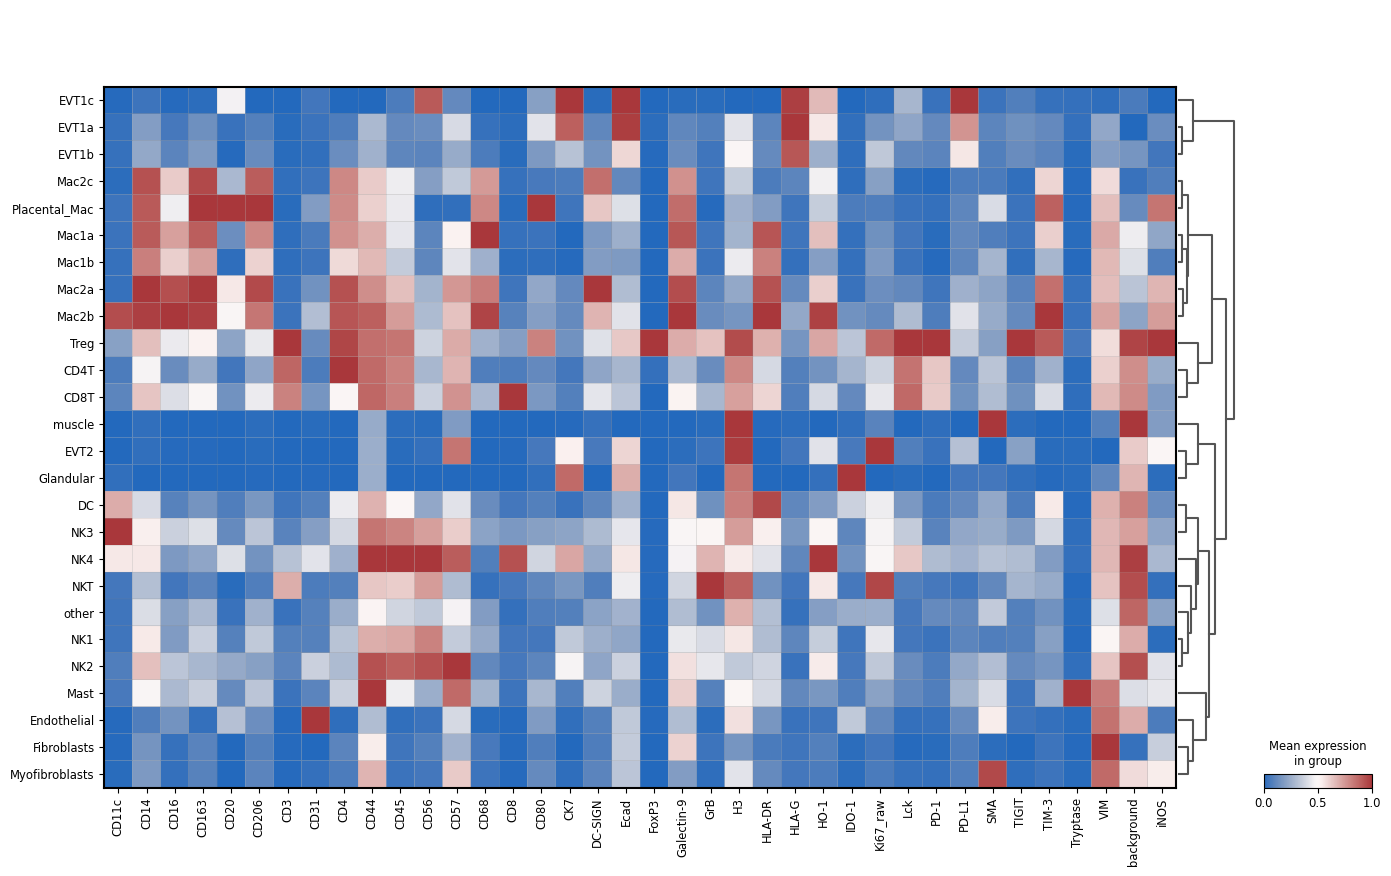

In [80]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, layer='zscore', standard_scale='var')

Myeloid compartment here is probably not clear, DC markers compared to Macrophages do not make much sense, not sure about 4 different NK cell clusters, no B cells?

In [73]:
sc.tl.rank_genes_groups(adata, groupby='cell_type' , method='wilcoxon')

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-pa

In [74]:
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

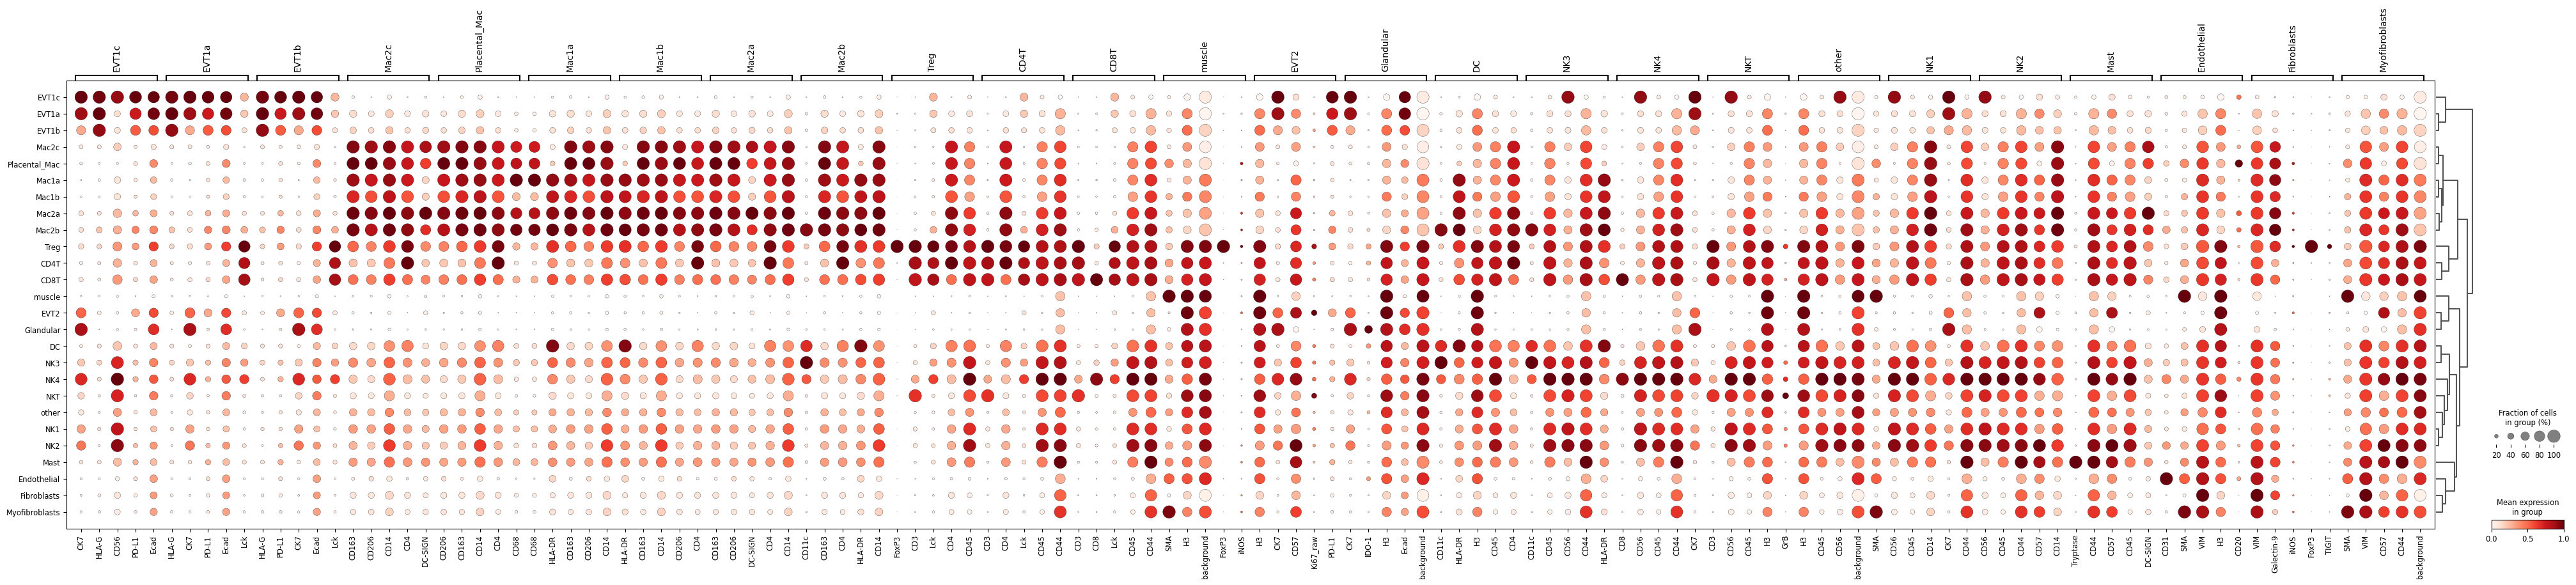

In [75]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups')

categories: CD4T, CD8T, DC, etc.
var_group_labels: CD4T, CD8T, DC, etc.


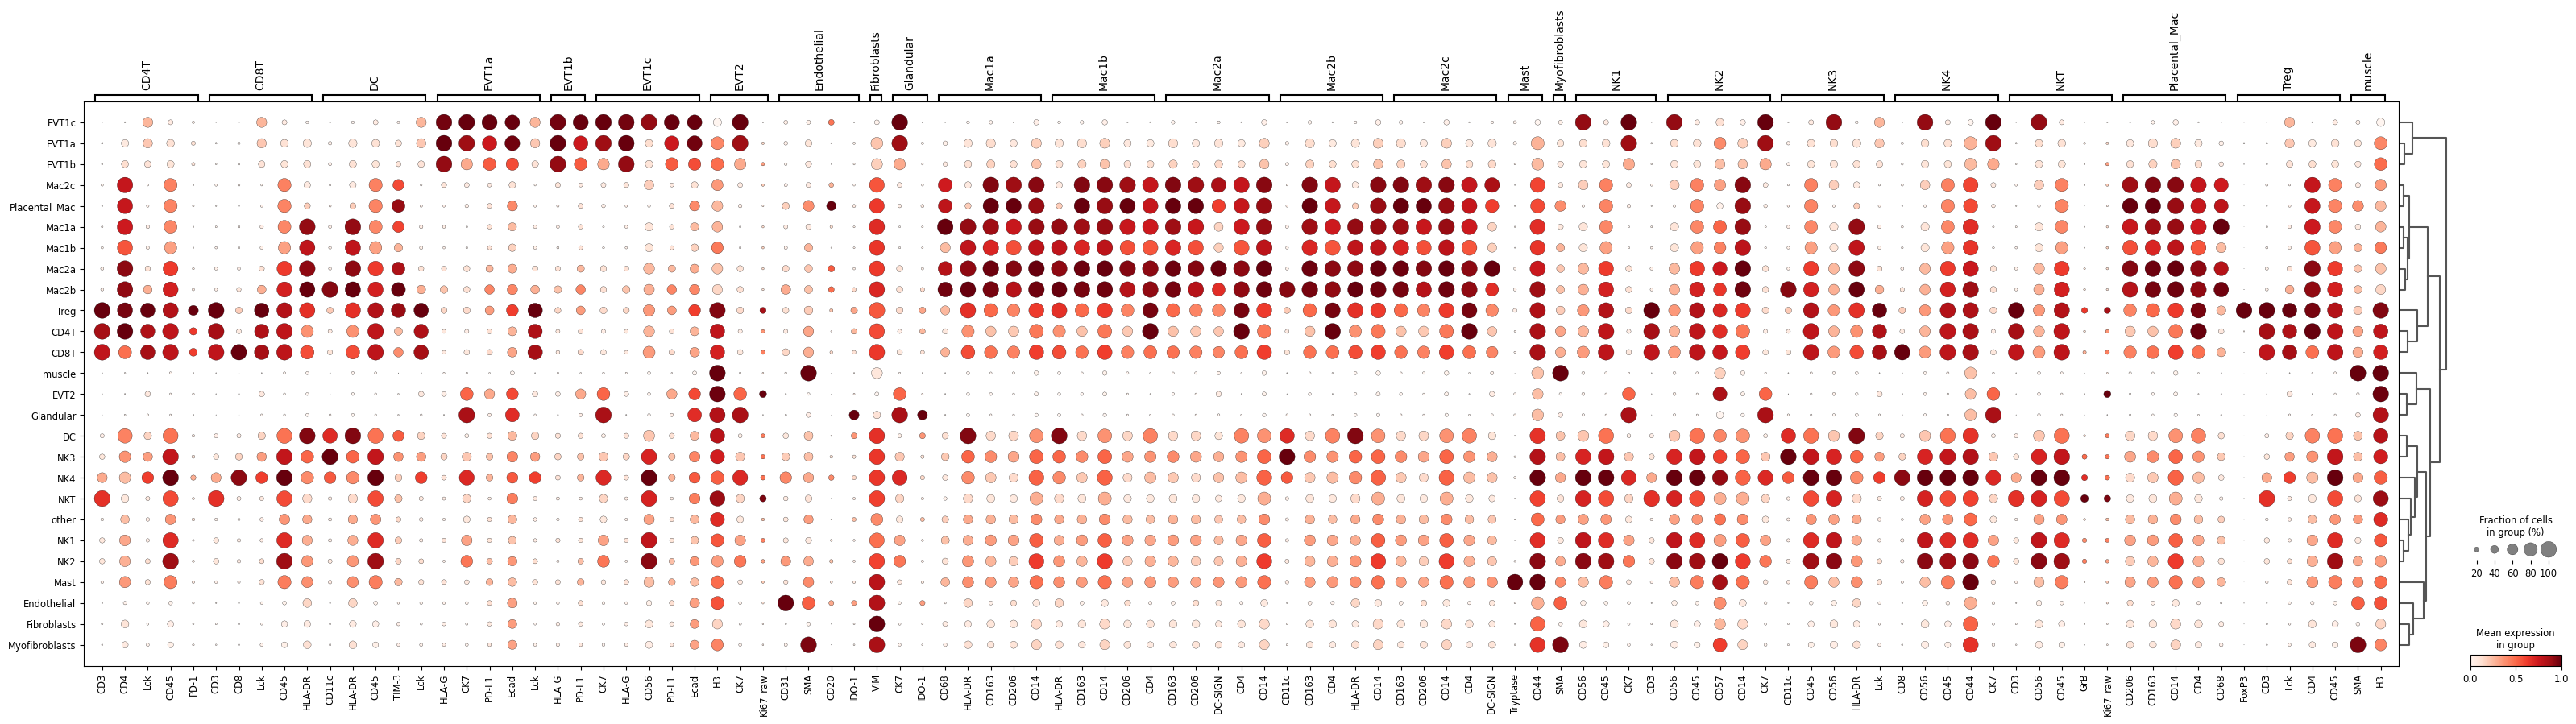

In [76]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')

## Harmonize celltype labels

In [24]:
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/feto_maternal_quantification.csv')
df

,CD11c,CD14,CD16,CD163,CD20,CD206,CD3,CD31,CD4,CD44,...,Point,x,y,area_nuclear,nucleated,overlap_decidua_only,point_mean_delta,distance_from_artery,cell_ID_in_Point,cell_type
0,0.000000,0.858311,0.769537,0.826435,0.305853,0.854678,0.000000,0.000000,0.869078,0.602367,...,10_31742_1_2,35,1146,0,0,1,1.645576,426.656771,1,Mac2a
1,0.000000,0.608643,0.000000,0.356172,0.000000,0.000000,0.613772,0.000000,0.000000,0.632391,...,10_31742_1_2,629,1245,205,1,0,1.645576,NaN,2,other
2,0.000000,0.821260,0.619963,0.814300,0.482688,0.728758,0.000000,0.000000,0.777645,0.618453,...,10_31742_1_2,1189,760,213,1,1,1.645576,328.184399,3,Mac2a
3,0.000000,0.818859,0.596728,0.623279,0.000000,0.507723,0.000000,0.000000,0.786343,0.612739,...,10_31742_1_2,1914,1151,269,1,1,1.645576,286.043703,4,Mac2a
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122189,...,10_31742_1_2,322,10,0,0,1,1.645576,505.262308,5,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.409816,...,16_31766_3_2,1846,1735,0,0,1,NaN,NaN,2488,Fibroblasts
495345,0.068865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16_31766_3_2,1718,796,159,1,1,NaN,NaN,2489,Fibroblasts
495346,0.725608,0.631638,0.537892,0.686284,0.277864,0.354021,0.000000,0.417691,0.591745,0.570298,...,16_31766_3_2,1977,472,0,0,1,NaN,NaN,2490,NK3
495347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095473,...,16_31766_3_2,431,749,0,0,1,NaN,NaN,2491,Fibroblasts


In [27]:
df['cell_type'].value_counts()

cell_type
Fibroblast        154723
Myofibroblasts     63399
M2a_Macrophage     42962
unedfined          38420
NK1                35805
EVT1a              25586
EVT1b              20236
Endothelial        19440
Glandular          18102
NK2                15450
M1b_Macrophage      9538
M2c_Macrophage      6893
NK3                 6756
CD8+_T_cell         5975
M1a_Macrophage      5885
EVT2                5419
EVT1c               3976
NK_T_cell           3237
muscle              3117
Placental_Mac       2148
NK4                 1941
CD4+_T_cell         1927
Dendritic_cell      1865
M2b_Macrophage      1780
Mast_cell            682
Treg                  87
Name: count, dtype: int64

In [26]:
df['cell_type'] = df['cell_type'].replace({'CD4T':'CD4+_T_cell', 'DC':'Dendritic_cell', 'CD8T':'CD8+_T_cell', 'Fibroblasts':'Fibroblast', 'Mac2a':'M2a_Macrophage',
                                           'Tumor':'Cancer', 'Cytotoxic CD8':'Cytotoxic_CD8+_T_cell','Mast':'Mast_cell', 'M1':'M1_Macrophage', 'NK':'NK_cell',
                                           'Mac1b':'M1b_Macrophage', 'Mac2c':'M2c_Macrophage', 'Mac1a':'M1a_Macrophage','NKT':'NK_T_cell',
                                           'Mac2b':'M2b_Macrophage','other':'unedfined'})

In [28]:
df.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/feto_maternal_quantification.csv', index=False)